In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.array([39, 36, 60, 21, 27, 12, 51, 57, 54, 42, 18, 9, 48, 66, 6, 30, 24, 33, 15, 21]).reshape(20, 1)
Y = np.array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]).reshape(20, 1)
display(x, Y)


array([[39],
       [36],
       [60],
       [21],
       [27],
       [12],
       [51],
       [57],
       [54],
       [42],
       [18],
       [ 9],
       [48],
       [66],
       [ 6],
       [30],
       [24],
       [33],
       [15],
       [21]])

array([[1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]])

Реализовать класс модели логистической регрессии с использованием:
а) максимизации логарифмического правдоподобия методом градиентного подъема
б) минимизации функции потерь (кросс-энтропии) методом градиентного спуска

Сравнить результаты (время исполнения и достигнутые значения accuracy и f1) в случаях а и б при одном и том же числе шагов и скорости обучения.



In [3]:
#Реализуем цикл градиентного спуска
class LogisticRegressionGD(object):
    def __init__(self):
        self.a = None
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    def predict(self, x):
        return self.sigmoid(np.matmul(x , self.a))
    def coefs(self):
        return self.a
    def LogLikelihood(self, x, Y):
        return (np.matmul(np.transpose(Y), np.log(self.predict(x) + 1e-8)) + np.matmul(np.ones((Y.shape[1], Y.shape[0])) - np.transpose(Y),
                                                                                      np.log(np.ones((Y.shape[0], Y.shape[1])) - self.predict(x) + 1e-8)))[0][0]
    def CrossEntropy(self, x, Y):
        preds = self.predict(x)
        log_prob_pos = np.log(preds + 1e-8)
        log_prob_neg = np.log(1 - preds + 1e-8)
        cross_entropy = -np.sum(Y * log_prob_pos + (1 - Y) * log_prob_neg) / len(Y)
        return cross_entropy
    def accuracy(self, x, Y):
        return (Y == self.predict(x)).mean()

    def fit(self, x, Y, alpha = 0.001, epsylon = 0.001, max_steps = 5000, Rtype = "LL"):
        self.a = np.ones(x.shape[1]).reshape(x.shape[1],1)
        # print(self.a)
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            if Rtype == "LL":
                new_error = self.LogLikelihood(x, Y)
                dT_a = np.matmul(np.transpose(x), Y - self.predict(x))
                #display("old a = ",self.a, "new_error = ", new_error, "dT_a = ", dT_a)
                self.a += alpha*dT_a
                #display("new a = ",self.a)
            elif Rtype == "CE":
                new_error = self.CrossEntropy(x, Y)
                dT_a = -np.matmul(np.transpose(x), Y - self.predict(x))
                #display("old a = ", self.a, "new_error = ", new_error, "dT_a = ", dT_a)
                self.a -= alpha* dT_a
                #display("new a = ",self.a)
            step += 1
            steps.append(step)
            errors.append(new_error)
            #print(step, new_error)
            if abs(new_error) < epsylon:
                break
        return steps, errors

In [4]:
x_ = x.copy()
import time

intercept = np.ones((x.shape[0], 1))
x_ = np.concatenate((intercept, x), axis = 1)


In [5]:
start_time = time.time()
regr = LogisticRegressionGD()
steps, errors =  regr.fit(x_, Y, alpha = 0.0005, epsylon = 0.001, max_steps = 20000, Rtype = "LL")

display('Время обучения: ', time.time() - start_time, 'сек.')

'Время обучения: '

2.2189078330993652

'сек.'

array([[-3.9945319 ],
       [ 0.12307633]])

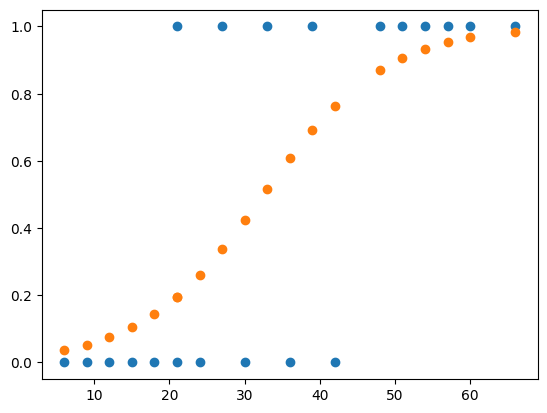

In [6]:
display(regr.coefs())
Y_Pred = regr.predict(x_)
plt.scatter(x, Y)
plt.scatter(x, Y_Pred);

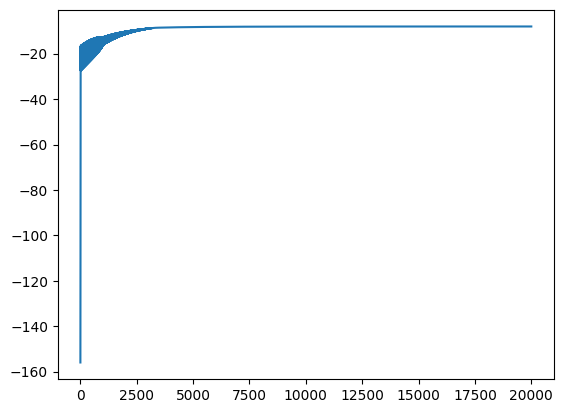

In [7]:
plt.plot(steps, errors)

Метрики accuracy и f1

In [8]:
from sklearn.metrics import accuracy_score, f1_score
print(f"Accuracy: {accuracy_score((regr.predict(x_) > 0.5).astype(int), Y)}")
print(f"f1_score: {f1_score((regr.predict(x_) > 0.5).astype(int), Y)}")

Accuracy: 0.8
f1_score: 0.8000000000000002


In [9]:
x_ = x.copy()
intercept = np.ones((x.shape[0], 1))
x_ = np.concatenate((intercept, x), axis = 1)
start_time = time.time()
regr = LogisticRegressionGD()
steps, errors =  regr.fit(x_, Y, alpha = 0.0005, epsylon = 0.001, max_steps = 20000, Rtype = "CE")
display('Время обучения: ', time.time() - start_time, 'сек.')

'Время обучения: '

1.7272794246673584

'сек.'

array([[-3.9945319 ],
       [ 0.12307633]])

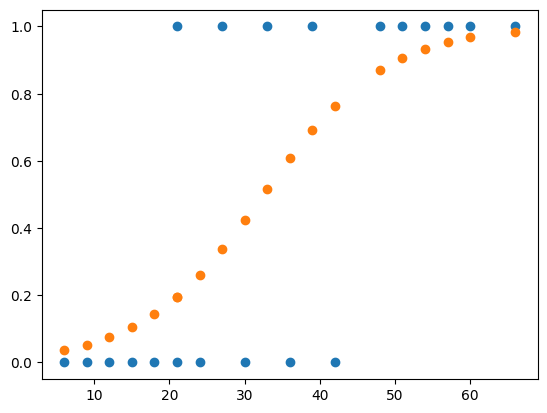

In [10]:
display(regr.coefs())
Y_Pred = regr.predict(x_)
plt.scatter(x, Y)
plt.scatter(x, Y_Pred);

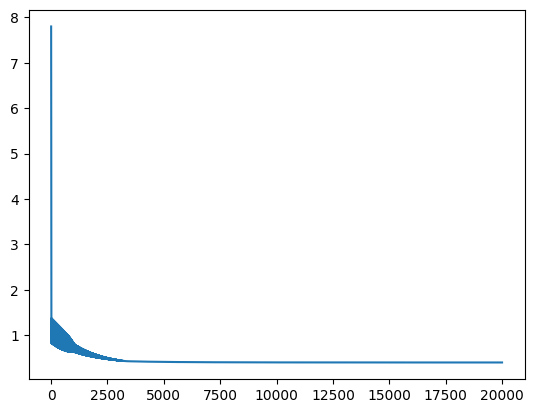

In [11]:
plt.plot(steps, errors)

Метрики

In [12]:
print(f"Accuracy: {accuracy_score((regr.predict(x_) > 0.5).astype(int), Y)}")
print(f"f1_score: {f1_score((regr.predict(x_) > 0.5).astype(int), Y)}")

Accuracy: 0.8
f1_score: 0.8000000000000002


##вывод
метрики одинаковые, время разнится - крос-энтропии оно больше на 0.3 секунды(1.7 против 2.0)

Реализовать расчеты способами а и б для набора данных из файла insclass_train.csv/
Для 151 406 договоров страхования транспортных средств известны значения ряда признаков, в том числе пол, возраст, стаж вождения и коэффициент бонус-малус водителя, тип, марка, модель, год выпуска, страна – производитель, мощность и объем двигателя, а также признак target, равный 1, если заключение договора с клиентом является рисковым, и 0 в противном случае (файл insclass_train.csv).

Требуется построить модель, предсказывающую значение признака target для 22 624 договоров из тестового набора данных (файл insclass_test.csv).

В обучающем наборе данных для каждого договора известны следующие поля:

variable_1 - агрегированный коэффициент бонус-малус (повышающий или понижающий стоимость полиса в зависимости от аварийности в предыдущие периоды);

variable_2 - индикатор расторжения договора по инициативе страхователя (клиента);

variable_3 - индикатор расторжения договора по инициативе страховщика (страховой компании);
variable_4 - идентификатор года выпуска транспортного средства;

variable_5 - идентификатор страны - производителя транспортного средства;

variable_6 - мощность двигателя в лошадиных силах;

variable_7 - объем двигателя в куб. см;

variable_8 - идентификатор стороны расположения руля (левый или правый);

variable_9 - пробег транспортного средства, покрываемый гарантией производителя;

variable_10 - индикатор действия гарантии на транспортное средство;

variable_11 - "мультидрайв" - индикатор допуска к управлению транспортным средством более одного водителя;

variable_12 - возраст транспортного средства (в мес.);

variable_13 - возраст водителя с максимальным стажем;

variable_14 - коэффициент возраст-стаж;

variable_15 - коэффициент краткосрочности;

variable_16 - коэффициент мощности;

variable_17 - коэффициент "мультидрайв";

variable_18 - территориальный коэффициент;

variable_19 - коэффициент "КНДР";

variable_20 - идентификатор канала продаж;

variable_21 - марка транспортного средства;

variable_22 - модель транспортного средства;

variable_23 - индикатор отечественных транспортных средств;

variable_24 - пол водителя с максимальным коэффициентом "возраст-стаж";

variable_25 - индикатор пролонгации;

variable_26 - индикатор совпадения собственника транспортного средства и водителя;

variable_27 - стаж водителя с максимальным коэффициентом "возраст-стаж";

variable_28 - тип транспортного средства;

target - класс риска, равный 1, если заключение договора с клиентом является рисковым, и 0 в противном случае.

In [13]:
df = pd.read_csv("insclass_train.csv")
df.head()

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_20,variable_21,variable_22,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,target
0,w200,0,0,14,q2,98.0,NaN,0.0,NaN,0,...,C,j2,h45,0,0.0,0,1,19.323463,t1,0
1,w160,0,0,7,q11,106.0,NaN,0.0,NaN,0,...,C,j33,h234,0,1.0,0,1,41.177900,t1,0
2,w200,0,0,4,q3,123.0,NaN,0.0,NaN,0,...,B,j12,h28,0,0.0,0,1,3.614395,t1,0
3,w200,0,0,9,q3,102.0,NaN,0.0,NaN,0,...,C,j12,h64,0,1.0,0,0,49.041674,t1,0
4,w200,0,0,18,q20,117.0,NaN,0.0,NaN,0,...,C,j111,h991,0,1.0,0,0,17.909612,t1,0


In [14]:
df.isna().sum()

variable_1          0
variable_2          0
variable_3          0
variable_4          0
variable_5          0
variable_6        111
variable_7      95639
variable_8      29899
variable_9     134436
variable_10         0
variable_11         0
variable_12      1528
variable_13      1657
variable_14      2927
variable_15    151393
variable_16        12
variable_17        12
variable_18        12
variable_19         0
variable_20         1
variable_21         0
variable_22         0
variable_23         0
variable_24      2207
variable_25         0
variable_26         0
variable_27      2067
variable_28         0
target              0
dtype: int64

In [22]:
minority_class = df[df['target'] == 1]
majority_class = df[df['target'] == 0]

if len(majority_class) > len(minority_class):
    majority_class_balanced = majority_class.sample(n=len(minority_class), replace=False, random_state=42)
    balanced_df = pd.concat([minority_class, majority_class_balanced], axis=0)
else:
    balanced_df = pd.concat([minority_class, majority_class], axis=0)

In [30]:
df["target"].value_counts()

0    136947
1     14459
Name: target, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
balanced_df = balanced_df.drop(columns=["variable_1", "variable_5","variable_20", "variable_21","variable_22", "variable_28",])
balanced_df = balanced_df.drop(['variable_7', 'variable_9', 'variable_15'], axis=1)
balanced_df = balanced_df.dropna()
df_train, df_test = train_test_split(balanced_df, random_state=42, test_size=0.2)

In [25]:
X_train, y_train = df_train.drop(columns="target").values, df_train["target"].values
X_test, y_test = df_test.drop(columns="target").values, df_test["target"].values

In [26]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [27]:
class LogisticRegressionGD(object):
    def __init__(self):
        self.a = None
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    def predict(self, x):
        return self.sigmoid(np.matmul(x , self.a))
    def coefs(self):
        return self.a
    def LogLikelihood(self, x, Y):
        return (np.matmul(np.transpose(Y), np.log(self.predict(x) + 1e-8)) + np.matmul(np.ones((Y.shape[1], Y.shape[0])) - np.transpose(Y),
                                                                                      np.log(np.ones((Y.shape[0], Y.shape[1])) - self.predict(x) + 1e-8)))[0][0]

    def CrossEntropy(self, x, Y):
        preds = self.predict(x)
        log_prob_pos = np.log(preds + 1e-8)
        log_prob_neg = np.log(1 - preds + 1e-8)
        cross_entropy = -np.sum(Y * log_prob_pos + (1 - Y) * log_prob_neg) / len(Y)
        return cross_entropy
    def accuracy(self, x, Y):
        return (Y == self.predict(x)).mean()

    def fit(self, x, Y, alpha = 0.001, epsylon = 0.001, max_steps = 5000, Rtype = "LL"):
        self.a = np.ones(x.shape[1]).reshape(x.shape[1],1)
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            if Rtype == "LL":
                new_error = self.LogLikelihood(x, Y)
                dT_a = np.matmul(np.transpose(x), Y - self.predict(x))
                self.a += alpha*dT_a
            elif Rtype == "CE":
                new_error = self.CrossEntropy(x, Y)
                dT_a = -np.matmul(np.transpose(x), Y - self.predict(x))
                self.a -= alpha * dT_a
            step += 1
            steps.append(step)
            errors.append(new_error)
            if abs(new_error) < epsylon:
                break
        return steps, errors

In [42]:
df = pd.read_csv("insclass_train.csv")
encoded_df.target.value_counts()

0    109391
1     89263
Name: target, dtype: int64

In [35]:
df = pd.read_csv("insclass_train.csv")
minority_class = df[df['target'] == 1]
majority_class = df[df['target'] == 0]
minority_class_balanced = minority_class.sample(n=len(majority_class), replace=True, random_state=42)
df = pd.concat([minority_class_balanced, majority_class], axis=0)
df = df.drop(['variable_7', 'variable_9', 'variable_15'], axis=1)
df = df.dropna()

In [36]:
encoded_df = pd.get_dummies(df, columns=['variable_1', 'variable_5', 'variable_20', 'variable_21','variable_22','variable_28',],
                            dtype=int)
encoded_df.head()

,variable_2,variable_3,variable_4,variable_6,variable_8,variable_10,variable_11,variable_12,variable_13,variable_14,...,variable_22_h994,variable_22_h995,variable_22_h996,variable_22_h998,variable_22_h999,variable_28_t1,variable_28_t2,variable_28_t3,variable_28_t4,variable_28_t5
57261,0,0,8,98.0,0.0,0,0,87.560950,34.495924,80.985224,...,0,0,0,0,0,1,0,0,0,0
140486,0,0,8,145.0,0.0,0,0,97.046523,33.144352,80.985224,...,0,0,0,0,0,1,0,0,0,0
55057,0,0,16,100.0,0.0,0,0,194.621521,109.845800,80.985224,...,0,0,0,0,0,1,0,0,0,0
124766,0,0,4,104.7,0.0,0,0,31.787491,41.177900,80.985224,...,0,0,0,0,0,1,0,0,0,0
117848,0,0,18,170.0,0.0,0,0,227.177018,37.183600,80.985224,...,0,0,0,0,0,1,0,0,0,0


In [37]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198654 entries, 57261 to 151405
Columns: 1577 entries, variable_2 to variable_28_t5
dtypes: float64(11), int32(1557), int64(9)
memory usage: 1.2 GB


In [38]:
df_train, df_test = train_test_split(encoded_df, random_state=42, test_size=0.2)
X_train, y_train = df_train.drop(columns="target").values, df_train["target"].values
X_test, y_test = df_test.drop(columns="target").values, df_test["target"].values
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [39]:
# intercept = np.ones((X_train.shape[0], 1))
# X_train_ = np.concatenate((intercept, X_train), axis = 1)
regr = LogisticRegressionGD()
steps, errors =  regr.fit(X_train, y_train, alpha = 0.0005, epsylon = 0.001, max_steps = 1000, Rtype = "CE")

C:\Users\xbowz\AppData\Local\Temp\ipykernel_4152\2881126915.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


In [40]:
print(f"Accuracy: {accuracy_score((regr.predict(X_test) > 0.5).astype(int), y_test)}")
print(f"f1_score: {f1_score((regr.predict(X_test) > 0.5).astype(int), y_test)}")

Accuracy: 0.5638418363494501
f1_score: 0.1253722303538081


C:\Users\xbowz\AppData\Local\Temp\ipykernel_4152\2881126915.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
C:\Users\xbowz\AppData\Local\Temp\ipykernel_4152\2881126915.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


In [43]:
regr = LogisticRegressionGD()
steps, errors =  regr.fit(X_train, y_train, alpha = 0.0005, epsylon = 0.001, max_steps = 1000, Rtype = "LL")
print(f"Accuracy: {accuracy_score((regr.predict(X_test) > 0.5).astype(int), y_test)}")
print(f"f1_score: {f1_score((regr.predict(X_test) > 0.5).astype(int), y_test)}")

C:\Users\xbowz\AppData\Local\Temp\ipykernel_4152\2881126915.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


Accuracy: 0.5638418363494501
f1_score: 0.1253722303538081


C:\Users\xbowz\AppData\Local\Temp\ipykernel_4152\2881126915.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
